# Segunda Atividade

Luciano Gonçalves Lopes Filho, 13676520

Marcelo Eduardo Reginato, 13676965

Marco Antonio Gaspar Garcia, 11833581

## Bibliotecas Utilizadas

In [41]:
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt

# Exercício A
![Screenshot 2023-05-04 at 21.32.34.png](<attachment:Screenshot 2023-05-04 at 21.32.34.png>)
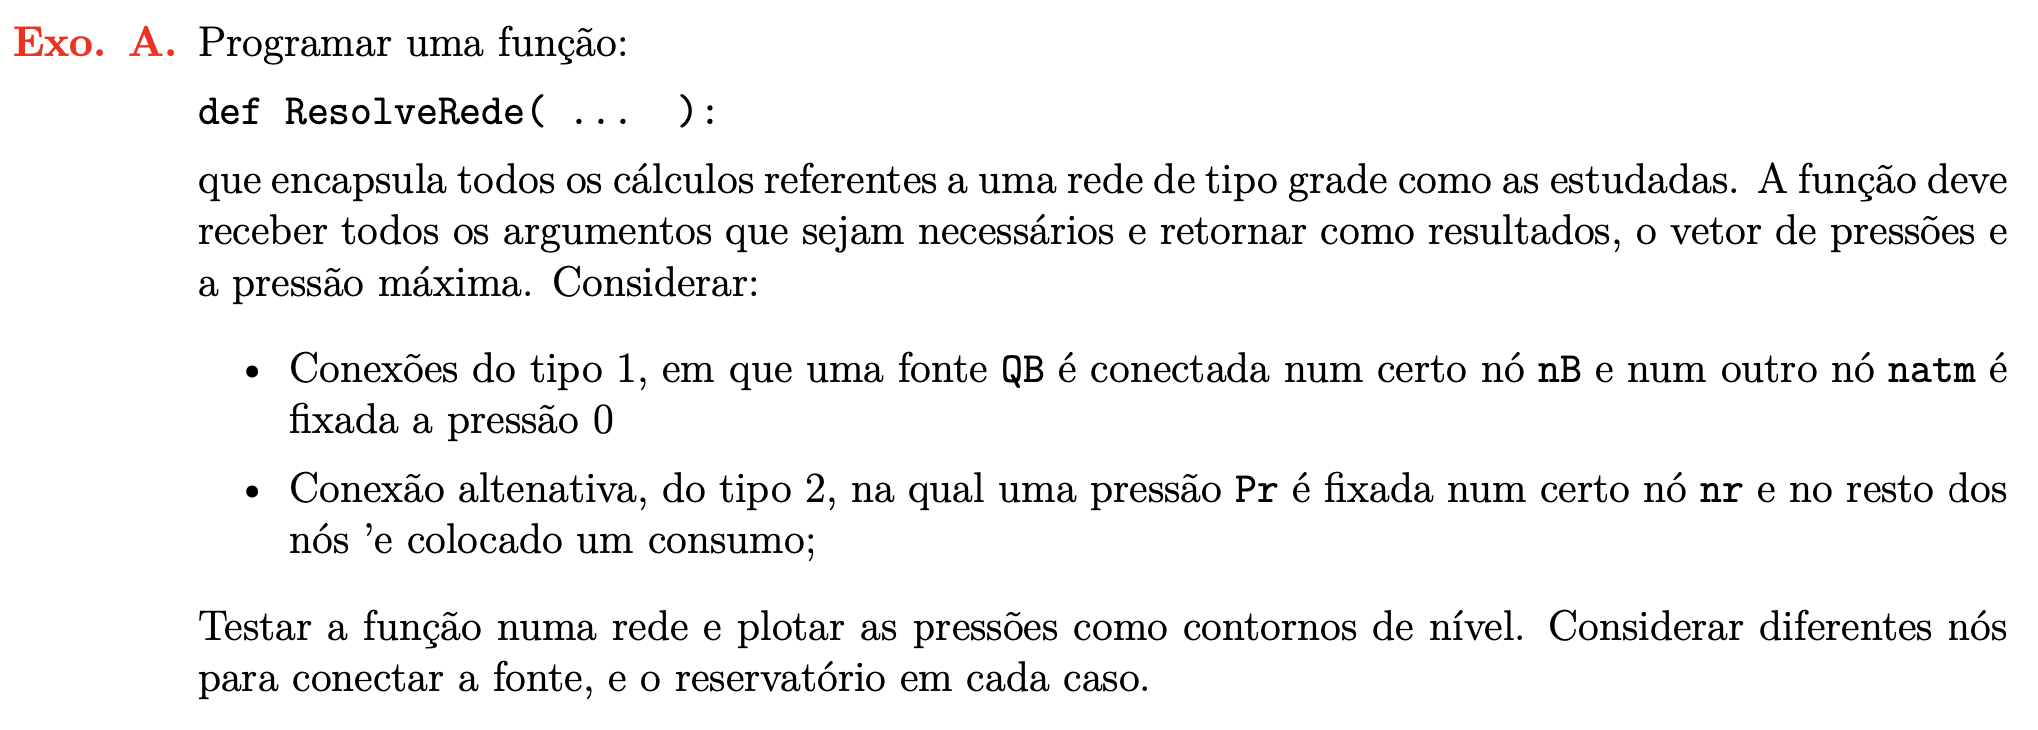

In [42]:
# Funçã para criar uma rede hidráulica com forma de grade retangular

# n == numero de linhas
# m == numero de colunas
# CH == Condutância Horizontal
# CV == Condutância Vertical
def GeraRede (n, m, CH, CV):
    
    nN = n * m              # número de nós
    nC = (n-1)*m + (m-1)*n  # número de canos

    coord = np.zeros(shape=(nN, 2))  # matriz de coordenadas para a plotagem dos nós

    for i in range (n):
        for j in range (m):
            k = i + j*n
            coord[k,0] = i
            coord[k,1] = j # gera uma matriz com todas as coordenadas quadradas, n x m

    # Matriz que informa as conexões
    conec = np.zeros(shape=(nC,2), dtype=int)

    # Vetor de condutâncias
    C = np.zeros(nC)

    # Loop sobre canos horizontais
    for j in range (m):
        for i in range (n-1):
            k = j*(n-1) + i
            conec[k,0] = j*n + i
            conec[k,1] = j*n + i+1
            C[k] = CH
    # Estabelece as conexões horizontais e associa a condutância a elas
    
    # Loop sobre canos verticais
    for i in range(n):
        for j in range(m-1):
            k = (n-1)*m + j*n + i
            conec[k,0] = i + j*n
            conec[k,1] = i + (j+1)*n
            C[k] = CV
    # Estabelece as conexões verticais e associa a condutância a elas
    
    return nN, nC, C, conec, coord

# funcao que monta a matriz global do sistema de equacoes
def Assembly (nN, nC, C, conec):

    # matriz quadrada, coeficientes das incognitas
    A = np.zeros(shape=(nN,nN))

    for k in range (nC):
        Coef = np.array([ [ C[k], -C[k] ], [ -C[k], C[k] ] ])
        i = conec[k,0]
        j = conec[k,1]
        A[i,i] += Coef[0,0]
        A[j,j] += Coef[1,1]
        A[i,j] += Coef[0,1]
        A[j,i] += Coef[1,0] 
    
    return A
    
# nAtm: a pressao neste nó vale zero, conectada a atmosfera
# nB é o nó que tem vazão igual a QB (bomba)
def ResolveRede1 (nN, nC, C, conec, nAtm, nB, QB):

    # Montando a matriz
    A = Assembly(nN, nC, C, conec)

    # Deep Copy
    Copia = np.copy(A)
    Copia[nAtm,:] = 0.0     # zera a linha do nAtm
    Copia[nAtm,nAtm] = 1.0  # pressao atm = 0

    B = np.zeros(nN, dtype=float)  
    B[nB] = QB

    pressoes = np.linalg.solve(Copia, B)

    return pressoes, np.max(pressoes)

# nr: A pressão neste nó vale Pr
def ResolveRede2 (nN, nC, C, conec, nr, Pr):

    # Montando a matriz
    A = Assembly(nN, nC, C, conec)

    # Deep Copy
    Copia = np.copy(A)
    Copia[nr,:] = 0.0
    Copia[nr,nr] = 1.0
    
    B = -0.1*np.ones(nN, dtype=float)
    B[nr] = Pr

    pressoes = np.linalg.solve(Copia, B)

    return pressoes, np.max(pressoes)

# Funcao que Plota a rede hidráulica
def PlotaRede(conec, coord):

    fig, ax = plt.subplots()
    nC = conec.shape[0]
    temp = np.zeros((2,2))

    for i in range(nC):
        temp[0,:] = coord[conec[i,0],0], coord[conec[i,0],1]
        temp[1,:] = coord[conec[i,1],0], coord[conec[i,1],1]
        linecolor = '-ob'
        ax.plot(temp[:,0], temp[:,1], linecolor, linewidth=1.0)
    
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Hydraulic Network')
    plt.show()
    
    return

# Funcao que plota os contornos de nível das pressoes
def PlotPressure(n, m, pressure):
    x = np.arange(0, n, 1)
    y = np.arange(0, m, 1)
    X,Y = np.meshgrid(x,y)
    Z = np.copy(pressure)
    Z.shape = (m,n)
    fig, ax = plt.subplots(figsize=(7,7))
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Countours of Pressure')
    ax.grid()
    '''
    ax.set_xticks(x)
    ax.set_yticks(y)
    '''
    cp = plt.contourf(X, Y, Z, 15, cmap='rainbow')
    plt.colorbar(cp)
    plt.show()



1.566732040710285


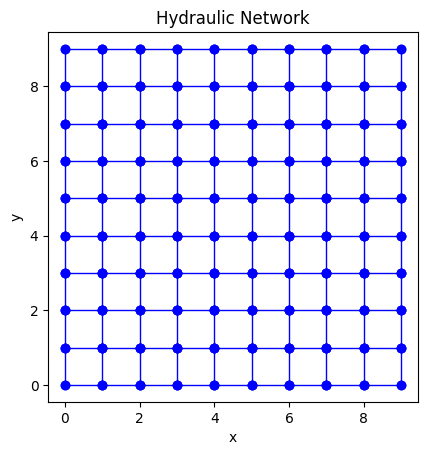

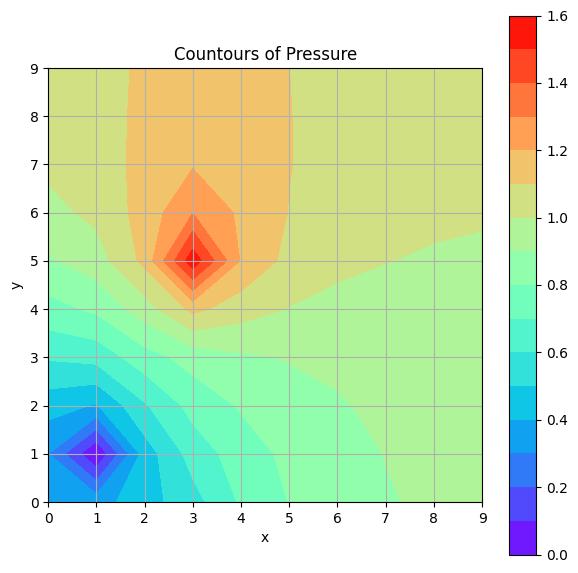

In [43]:
# ------ Resolvendo Rede, Exemplo 1 ------ #

# definindo as dimensoes e as condutancias
n, m = 10, 10
CH = 3.0
CV = 5.0

# Gerando a rede
nN, nC, C_grade, conec_grade, coord_grade = GeraRede(n, m, CH, CV)

# Conexão do tipo 1
nAtm = 12-1
nB = 54-1
QB = 6.0

# Colocando canos grossos em alguns lugares
list = [0, 1, 2, 30, 31, 32, 93, 103, 113]
C_grade[list] = 20.0

# Resolvendo a rede
pressoes, pMax = ResolveRede1(nN, nC, C_grade, conec_grade, nAtm, nB, QB)
print(pMax)

PlotaRede(conec_grade, coord_grade)
PlotPressure(n, m, pressoes)

12.000000000000009


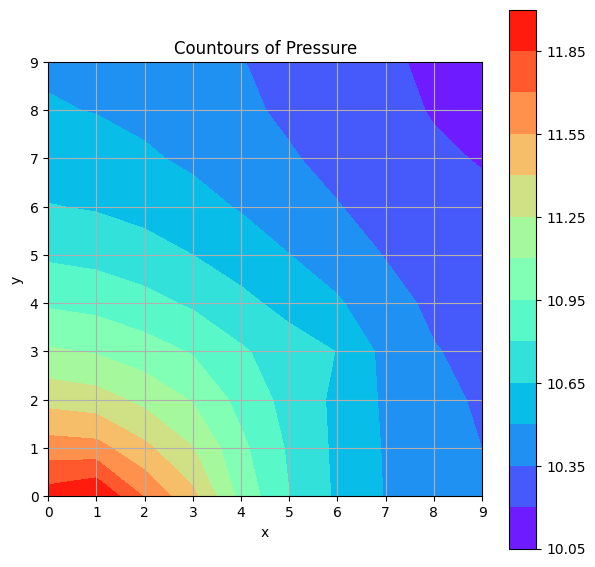

In [44]:
# ------ Resolvendo Rede, Exemplo 2 ------ #

# definindo as dimensoes e as condutancias
n, m = 10, 10
CH = 3.0
CV = 5.0

# Gerando a rede
nN, nC, C_grade, conec_grade, coord_grade = GeraRede(n, m, CH, CV)

# Conexão do tipo 2
nr = 2-1
Pr = 12.0

# Colocando canos grossos em alguns lugares
list = [0, 1, 2, 30, 31, 32, 93, 103, 113]
C_grade[list] = 20.0

# Resolvendo a rede
pressoes, pMax = ResolveRede2(nN, nC, C_grade, conec_grade, nr, Pr)
print(pMax)

PlotPressure(n, m, pressoes)

3.8150573320138426


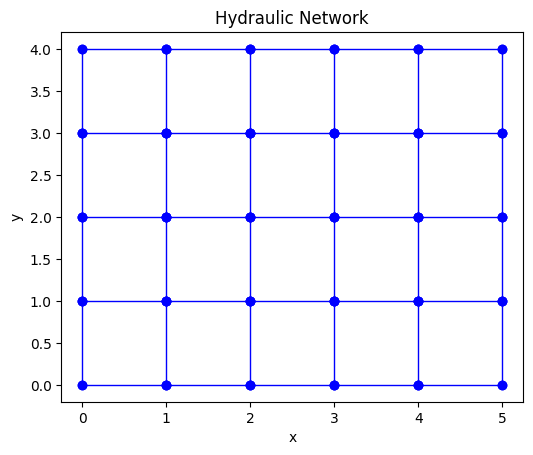

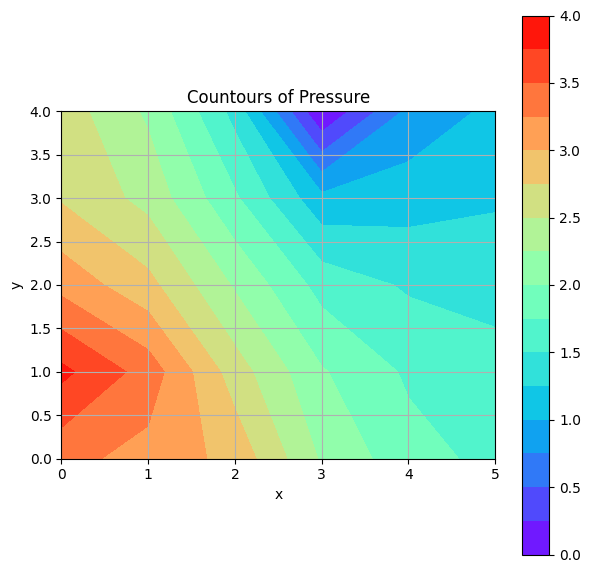

In [45]:
# ------ Resolvendo Rede, Exemplo 3 ------ #

# *** Este exemplo irá valer para os exercícios B e C *** #

# definindo as dimensoes e as condutancias
n, m = 6, 5
CH = 3.0
CV = 5.0

# Gerando a rede
nN, nC, C_grade, conec_grade, coord_grade = GeraRede(n, m, CH, CV)

# Conexão do tipo 1
nAtm = 28-1
nB = 7-1
QB = 12.0

# Colocando canos grossos em alguns lugares
list = [0, 1, 5, 43]
C_grade[list] = 15.0

# Resolvendo a rede
pressoes, pMax = ResolveRede1(nN, nC, C_grade, conec_grade, nAtm, nB, QB)
print(pMax)

PlotaRede(conec_grade, coord_grade)
PlotPressure(n, m, pressoes)

# Exercício B
![Screenshot 2023-05-06 at 21.16.40.png](<attachment:Screenshot 2023-05-06 at 21.16.40.png>)
![Screenshot 2023-05-06 at 21.16.49.png](<attachment:Screenshot 2023-05-06 at 21.16.49.png>)
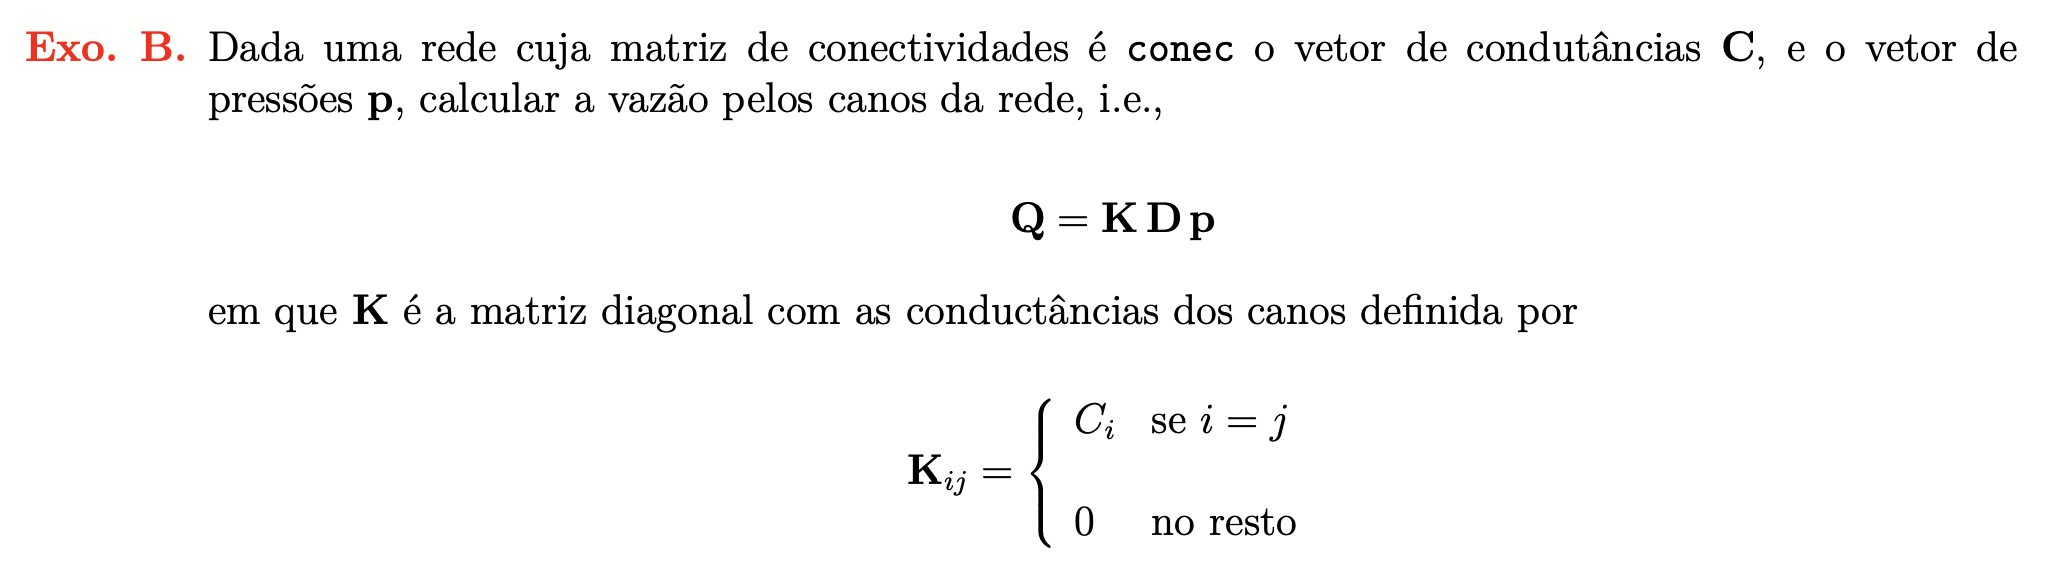
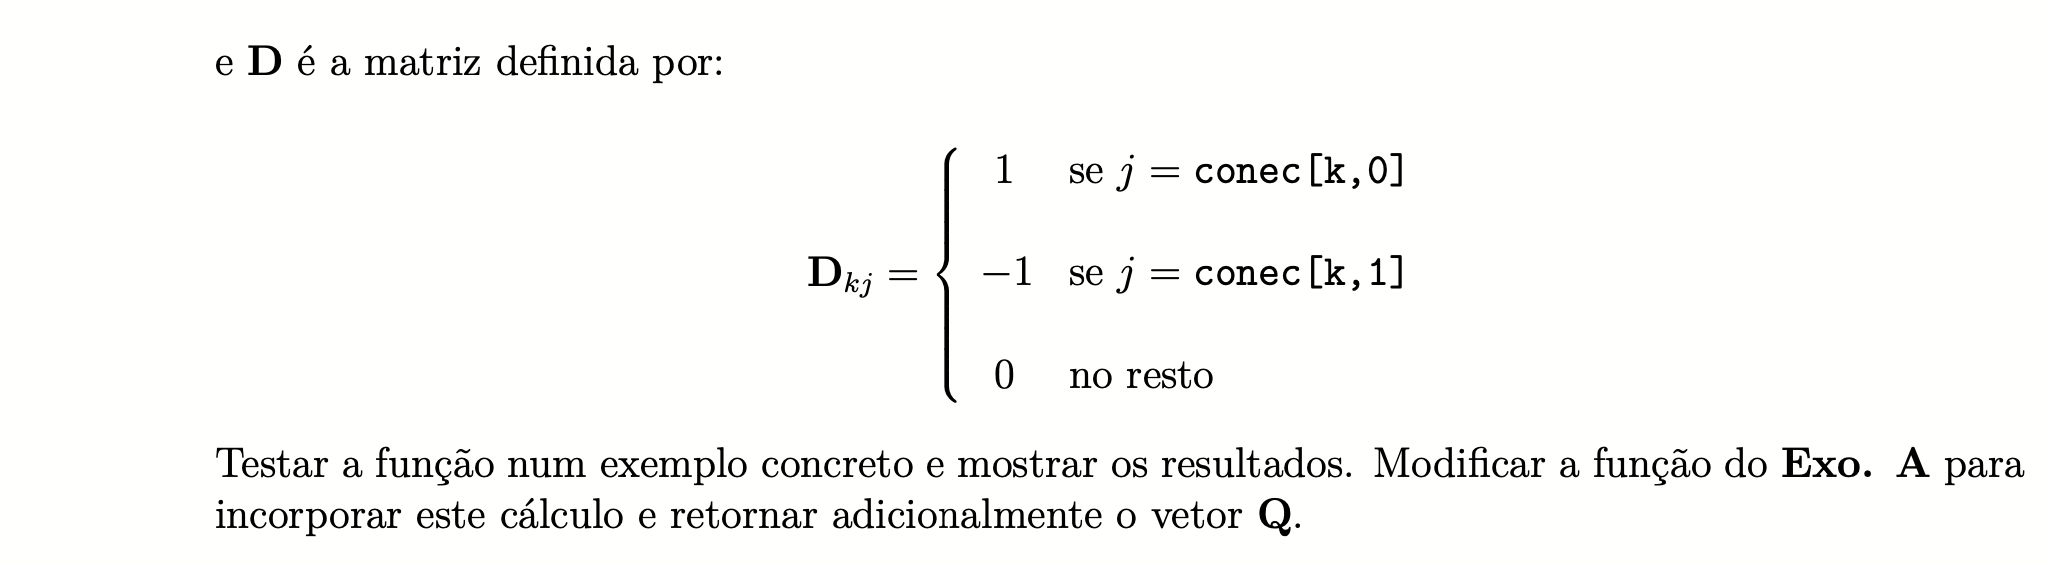

In [46]:
# Função que constrói K
def ConstroiMatrizK(nC, C):

    K = np.zeros(shape=(nC,nC))
    
    for i in range(nC) :
    
        K[i,i] = C[i]

    return K

# Funcao que constroi D
def ConstroiMatrizD(nN, nC, conec):

    D = np.zeros(shape=(nC,nN))

    for k in range(nC) :
        for j in range(nN) :

            if j == conec[k,0] :
                D[k,j] = 1

            elif j == conec[k,1] :
                D[k,j] = -1

    return D

# Funcao que retorna o vetor de vazões
def ResolveVazaoQ(nN, nC, C, conec, p):

    K = ConstroiMatrizK(nC, C)
    D = ConstroiMatrizD(nN, nC, conec)
    
    Q = K @ D @ p

    return Q

# Modificando a função do Exo. A para abarcar as necessidades do Exo. B
def ResolveRedeB(nN, nC, C, conec, nAtm, nB, QB):
    
    A = Assembly(nN, nC, C, conec)
    Copia = np.copy(A)

    Copia[nAtm,:] = 0.0
    Copia[nAtm,nAtm] = 1.0

    B = np.zeros(nN, dtype=float)
    B[nB] = QB

    pressure = np.linalg.solve(Copia, B)
    pMax = np.max(pressure)

    Q = ResolveVazaoQ(nN, nC, C, conec, pressure)

    return pressure, pMax, Q

pressoes, pMax, Q = ResolveRedeB(nN, nC, C_grade, conec_grade, nAtm, nB, QB)



In [47]:
# Q = KDp
# K: nC x nC
# D: nC x nN
# p: nN x 1
# portanto: Q tem dimensão nC x 1

print("Pressão em cada um dos nós:\n", pressoes)
print("Pressão Máxima:", pMax)
print("Vetor de Vazões:\n", Q)

Pressão em cada um dos nós:
 [3.32557878e+00 3.16241926e+00 2.92200851e+00 2.21915407e+00
 1.84184497e+00 1.68254260e+00 3.81505733e+00 3.39417296e+00
 2.62248893e+00 2.02382686e+00 1.71104093e+00 1.58696118e+00
 3.16718901e+00 2.82628394e+00 2.21915619e+00 1.65697397e+00
 1.46701318e+00 1.41693191e+00 2.72386373e+00 2.41812852e+00
 1.78885612e+00 1.06678821e+00 1.13905773e+00 1.21685388e+00
 2.63723568e+00 2.20409543e+00 1.41423335e+00 3.43473960e-17
 8.07786295e-01 1.06345353e+00]
Pressão Máxima: 3.8150573320138426
Vetor de Vazões:
 [ 2.44739276  3.60616123  2.10856334  1.1319273   0.4779071   6.31326563
  2.31505207  1.79598622  0.93835779  0.37223925  1.02271522  1.82138325
  1.68654666  0.56988235  0.15024382  0.91720563  1.88781722  2.16620372
 -0.21680855 -0.23338845  1.29942076  2.36958623  4.24270006 -2.42335889
 -0.76700172 -2.44739276 -1.15876847  1.4975979   0.97663604  0.65402019
  0.4779071   3.23934161  2.8394451   2.01666374  1.83426447  1.22013874
  0.85014635  2.21662

# Exercício C
![Screenshot 2023-05-06 at 21.20.02.png](<attachment:Screenshot 2023-05-06 at 21.20.02.png>)
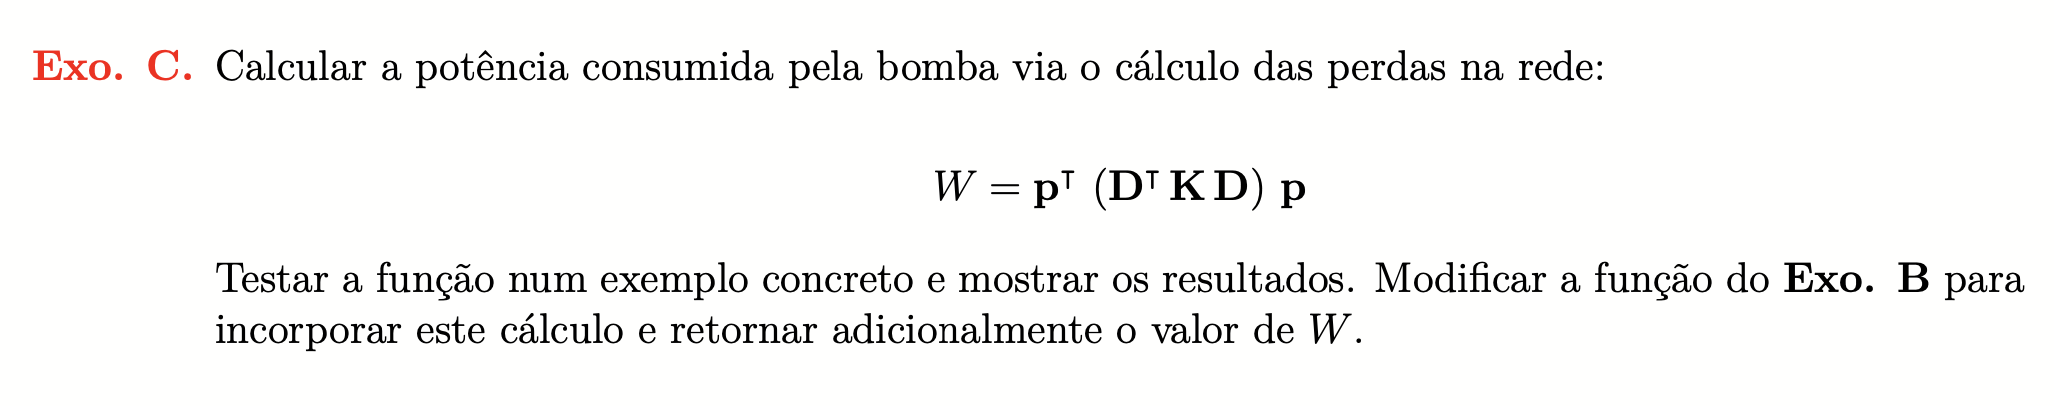

In [48]:
# pˆt é a matriz transposta de p
# Dˆt é a matriz transposta de D

# Funcao que calcula a potencia consumida pela bomba (W é escalar)
def PotenciaBomba(p, D, K):

    pt = np.transpose(p)
    Dt = np.transpose(D)

    W = pt @ (Dt @ K @ D) @ p

    return W

# Retorna o vetor de vazoes Q e a potencia W
def ResolveQW(nN, nC, C, conec, p):

    K = ConstroiMatrizK(nC, C)
    D = ConstroiMatrizD(nN, nC, conec)
    
    Q = K @ D @ p

    W = PotenciaBomba(p, D, K)

    return Q, W

# Modificando a função do Exo. B para abarcar as necessidades do Exo. C
def ResolveRedeC(nN, nC, C, conec, nAtm, nB, QB):
    
    A = Assembly(nN, nC, C, conec)
    Copia = np.copy(A)

    Copia[nAtm,:] = 0.0
    Copia[nAtm,nAtm] = 1.0

    B = np.zeros(nN, dtype=float)
    B[nB] = QB

    pressure = np.linalg.solve(Copia, B)
    pMax = np.max(pressure)

    Q, W = ResolveQW (nN, nC, C, conec, pressure)

    return pressure, pMax, Q, W


pressoes, pMax, Q, W = ResolveRedeC(nN, nC, C_grade, conec_grade, nAtm, nB, QB)

In [49]:
# W = pˆt(DˆtKD)p
# pˆt: 1 x nN
# Dˆt: nN x nC
# K: nC x nC
# D: nC x nN
# p: nN x 1
# portanto: W tem dimensão 1 x 1

print("Pressão em cada um dos nós:\n", pressoes)
print("Pressão Máxima:", pMax)
print("Vetor de Vazões:\n", Q)
print("Potência:", W)

Pressão em cada um dos nós:
 [3.32557878e+00 3.16241926e+00 2.92200851e+00 2.21915407e+00
 1.84184497e+00 1.68254260e+00 3.81505733e+00 3.39417296e+00
 2.62248893e+00 2.02382686e+00 1.71104093e+00 1.58696118e+00
 3.16718901e+00 2.82628394e+00 2.21915619e+00 1.65697397e+00
 1.46701318e+00 1.41693191e+00 2.72386373e+00 2.41812852e+00
 1.78885612e+00 1.06678821e+00 1.13905773e+00 1.21685388e+00
 2.63723568e+00 2.20409543e+00 1.41423335e+00 3.43473960e-17
 8.07786295e-01 1.06345353e+00]
Pressão Máxima: 3.8150573320138426
Vetor de Vazões:
 [ 2.44739276  3.60616123  2.10856334  1.1319273   0.4779071   6.31326563
  2.31505207  1.79598622  0.93835779  0.37223925  1.02271522  1.82138325
  1.68654666  0.56988235  0.15024382  0.91720563  1.88781722  2.16620372
 -0.21680855 -0.23338845  1.29942076  2.36958623  4.24270006 -2.42335889
 -0.76700172 -2.44739276 -1.15876847  1.4975979   0.97663604  0.65402019
  0.4779071   3.23934161  2.8394451   2.01666374  1.83426447  1.22013874
  0.85014635  2.21662

# Exercício D
![Screenshot 2023-05-06 at 21.20.33.png](<attachment:Screenshot 2023-05-06 at 21.20.33.png>)
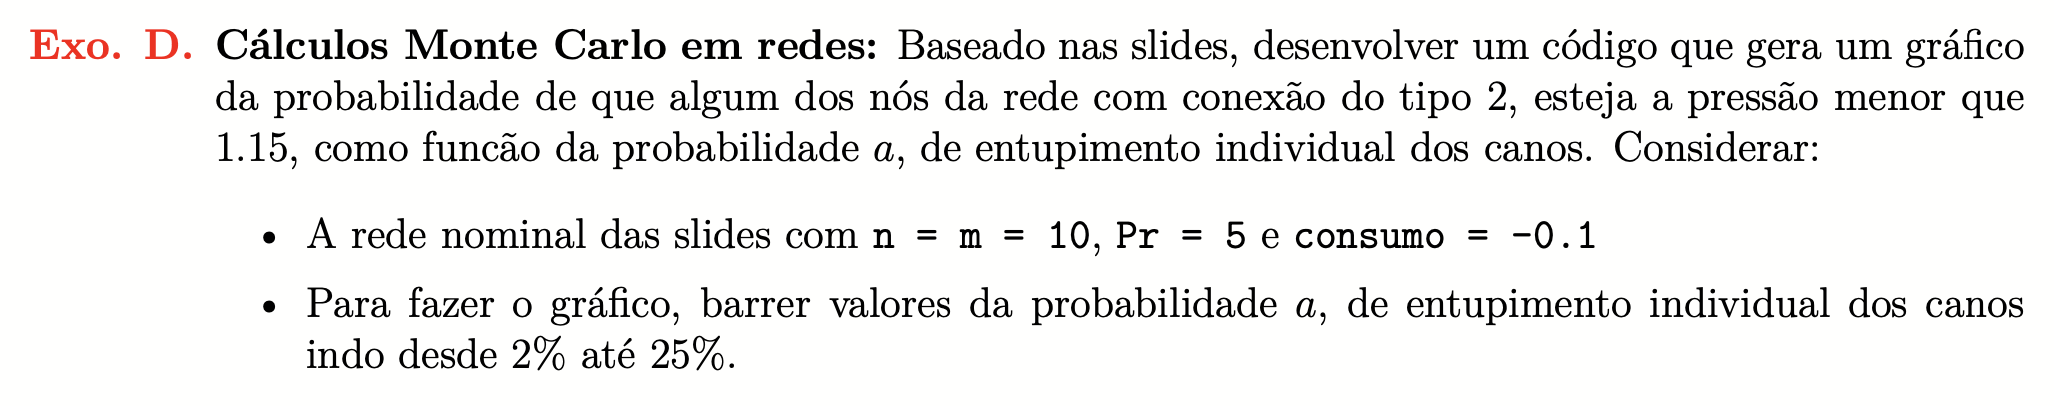